<a href="https://colab.research.google.com/github/YuHsin-Chen1221/NeuroAI-Summer-School-25/blob/main/Cortical_Architecture_with_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.2624 - loss: 159.7567 - val_accuracy: 0.7754 - val_loss: 19.0037
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5681 - loss: 62.8708 - val_accuracy: 0.8415 - val_loss: 13.8325
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6682 - loss: 43.4462 - val_accuracy: 0.8669 - val_loss: 11.7067
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7212 - loss: 33.9841 - val_accuracy: 0.8818 - val_loss: 10.3897
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7548 - loss: 27.9284 - val_accuracy: 0.8907 - val_loss: 9.4808
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7800 - loss: 24.2554 - val_accuracy: 0.8982 - val_loss: 8.6841
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7895 - loss: 21.4650 - val_accuracy: 0.9038 - val_loss: 8.0171
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8033 - l

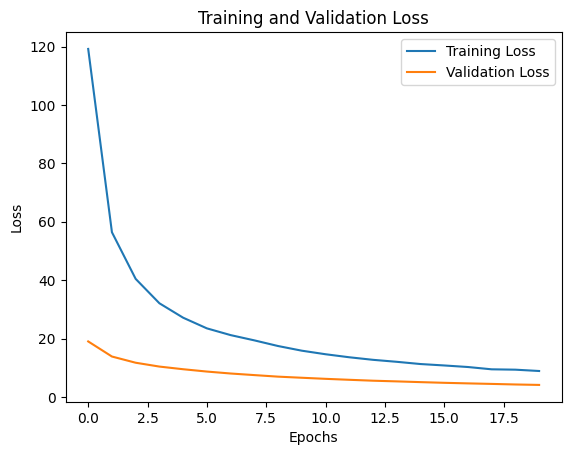

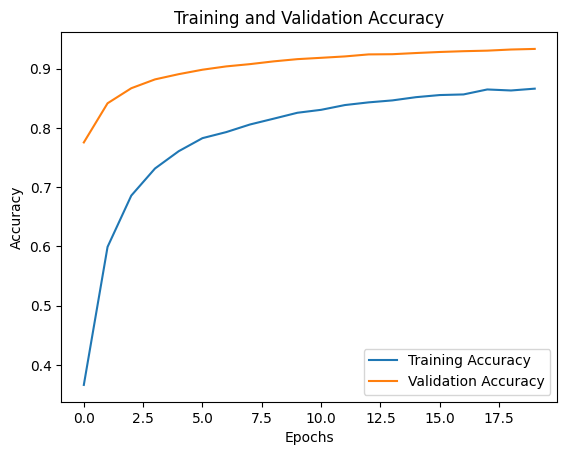

In [1]:
#載入必要套件
import tensorflow as tf
import keras.layers as layers
import keras.models as model
from keras.layers import Dropout
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from matplotlib.pylab import plt
import random
import numpy as np
import os
def seed_tf(seed=1):
  os.environ['PYTHONHASHSEED'] = str(seed)
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ['TFDETERMINISTIC_OPS'] = '1'
seed_tf(1)

#資料輸入與前處理
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#建立模型
network = model.Sequential()
#建立輸入層和隱藏層
# 定義隱藏層神經元個數
# 輸入28＊28=784個float數字
# 使用normal distribution常態分佈
# 定義激活函數為relu
network.add(layers.Dense(units=1024, input_dim=784, kernel_initializer='normal', activation='relu'))
network.add(Dropout(0.5))
#network.add(layers.Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
#network.add(Dropout(0.5))
#network.add(layers.Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
#network.add(Dropout(0.5))

#建立輸出層
# 定義輸出層為10(數字0～9)
# 也是使用常態分佈初始化
# 定義激活函數為softmax
# 這裡建立的Dense層不用設定input dim，因為keras會自動照上一層的256設定
network.add(layers.Dense(10, activation='softmax', kernel_initializer='normal'))

# 模型訓練前要用compile對模型進行設定
# loss：在深度學習常應用cross entropy交叉熵，訓練效果較好
# optimizer：設定訓練時依優化的方式，在深度學習使用Adam最佳
# metrics：設定評估模型的方法是accuracy準確率
optimizer=tf.optimizers.Adadelta(learning_rate=0.005)
network.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])



#模型開始訓練
# 設定輸入資料 epochs期數 batch_size批次
# 用測試資料測試模型
# 印出test accuracy測試準確率
epoch=20
history = network.fit(train_images, train_labels, epochs=epoch, batch_size=16, validation_split=0.2)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


#訓練結果視覺化
epoch = range(epoch)
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
# 畫出loss的訓練曲線
plt.plot(epoch, train_loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure()
# 畫出accuracy的訓練曲線
plt.plot(epoch, train_acc, label='Training Accuracy')
plt.plot(epoch, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()